In [268]:
# LEANNE DAVID - 303048569
# MATTHEW GERLITS - 303625639
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Question1: Handwriting Recognition:

a. Download the dataset "Digit" and the corresponding csv file that includes the labels of the images.

In [269]:
label_df = pd.read_csv('label.csv') # name of the file / digit
#label_df

We first create an empty DataFrame that will store all the combined images with the label.csv file. We then iterate using the index size of the label_df created above. 

**files** temporarily holds the current 'x' in the for loop along with its features (in this case, the 'Digit' columnb).

**img** is used to get the matrix of the actual image file and then stored into a numpy array called pixels

**number** transposes the matrix to fit in one row with each pixel being its own column

**number.columns code snippet ** reduces the column name since it became multi-index when storing it into a dataframe

**X** = all the features <br/>
**Y** = label vector

In [270]:
df = pd.DataFrame([])

for x in range(len(label_df.index)):
    files = label_df.iloc[x, :]
    img = mpimg.imread('Digit/' + str(files.values[0]) + '.jpg')
    pixels = np.array(img)
    number = pd.DataFrame(pixels).stack().to_frame().T
    number.columns = number.columns.droplevel(0)
    df = df.append(number, ignore_index=True)

df = label_df.join(df)

x = df.iloc[:, 2:]
y = df['digit']

df

name of the file  digit   0   1    2    3    4    5    6   7 ...    6  \
0                    0      0   0   2   88  217  158   21    0   0 ...    4   
1                    1      1   0   0   11  187  210   78    5   0 ...    0   
2                    2      2   0   0    5   59  240  199    2   0 ...   92   
3                    3      3   6   0  108  255  213   13   10   0 ...  168   
4                    4      4   0   6    0   34  160    7    7   0 ...    7   
5                    5      5  15   0  200  149    2    0   13   0 ...   69   
6                    6      6   0  13    0  192  210    0   10   0 ...  134   
7                    7      7  10   0  114  133  203  255  235  16 ...    0   
8                    8      8   0   7  145  223  128   13    0   2 ...  133   
9                    9      9   0   0  174  199    5    0    0   8 ...   90   
10                  10      0   0  11    8  139  235  177    4   0 ...    0   
11                  11      1   4   2    0    0  227  207   16   7 ...    4   
12                  12      2   3   1   72  199   12    2    0   3 ...  130   
13                  13      3   1  36  145  237  220  143   49   0 ...   90   
14                  14      4   4   1    4  118  231   27    0   4 ...   10   
15                  15      5   6  76  196  189  255  251   13  14 ...    0   
16                  16      6   0   0    0  132  236   10    7   0 ...  255   
17                  17      7   3   0   24  118  247  149    5   3 ...    0   
18                  18      8   0   0  165  113  210  152    0   0 ...    5   
19                  19      9   0  16   94  212   71    0    1   0 ...  255   
20                  20      0   9   0   57  200  186  120    0   0 ...    0   
21                  21      1   0  12    0   36  255  254   24   3 ...   33   
22                  22      2   4   3  122  253   78    5    0  12 ...   65   
23                  23      3   0  24  141  199  255  229   62   6 ...    5   
24                  24      4   4   0   10    0  184   47    0   0 ...    8   
25                  25      5   3   0  190  123  131  111    0   5 ...    2   
26                  26      6   0   0   27  211  223   45    0   0 ...  190   
27                  27      7   0   3    0  123  222  229   36   0 ...    0   
28                  28      8   4   0  167  167   69    6    0   1 ...    8   
29                  29      9   1   0  139  211  110    0    1   8 ...  255   
...                ...    ...  ..  ..  ...  ...  ...  ...  ...  .. ...  ...   
1767              1767      4   0   0    7   24  255   27    0  13 ...    0   
1768              1768      0   5   0   81  246  173    1    0   4 ...   75   
1769              1769      5   0   4  143  178  234  108    0   5 ...   34   
1770              1770      3   0  36  159  196  255  122    0   8 ...   87   
1771              1771      6   0  16    0   94  190   94    7   0 ...  193   
1772              1772      9   3   0   94  199  182  123    0   3 ...   12   
1773              1773      6   0   6   27  197  167    0    0   3 ...  177   
1774              1774      1   0   0   95  186  201   87    5   0 ...    0   
1775              1775      7   4   0  105  255  251   35    6   0 ...    0   
1776              1776      5   2   1  188  254  238  118    8   0 ...  113   
1777              1777      4   5   0    4   36  212    0    6   0 ...    0   
1778              1778      4   8   0   11   17  212  124    0   0 ...    0   
1779              1779      7   0   1   55  160  245  255   50   7 ...    7   
1780              1780      2   0  64  215  224  112    0    0   1 ...   92   
1781              1781      8   7   0  165  253  227   68   19   0 ...   26   
1782              1782      2   6   2  167  211   27    0   10   0 ...  192   
1783              1783      2   0   9  227  214   27    7    0   6 ...  228   
1784              1784      5   6   0   17  170  216  210    4   8 ...   45   
1785              1785      7   1  17  157  255  226   3

 c. Use sklearn functions to split the dataset into testing and training sets with the following parameters: test_size=0.1, random_state=2.

In [271]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=2)

d. Use scikit-learn “Random Forest” classifier to recognize the hand-written digits based on the training/testing datasets that we built and train our model.

In [272]:
my_RandomForest = \
RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=2)

my_RandomForest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=19, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [273]:
y_actual = np.array(y_test)
y_df = pd.DataFrame(y_test)

y_predict_rf = my_RandomForest.predict(x_test)

score_rf = accuracy_score(y_test, y_predict_rf)
  
print('Accuracy Score: ' + str(score_rf))

print('\nActual:')
print(y_actual)

print('\nPrediction:')
print(y_predict_rf)


Accuracy Score: 0.927777777778

Actual:
[4 0 9 1 4 7 1 5 1 6 6 7 6 1 5 5 4 6 2 7 4 6 4 1 5 2 9 5 4 6 5 6 3 4 0 9 9
 8 4 6 8 8 5 7 9 6 9 6 1 3 0 1 9 7 3 3 1 1 8 8 9 8 5 4 4 7 3 5 8 4 3 1 3 8
 7 3 3 0 8 7 2 8 5 3 8 7 6 4 6 2 2 0 1 1 5 3 5 7 6 8 2 2 6 4 6 7 3 7 3 9 4
 7 0 3 5 8 5 0 3 9 2 7 3 2 0 8 1 9 2 1 9 1 0 3 4 3 0 9 3 2 2 7 3 1 6 7 2 8
 3 1 1 6 4 8 2 1 8 4 1 3 1 1 9 5 4 8 7 4 8 9 5 7 6 9 0 0 4 0 0 4]

Prediction:
[4 0 9 1 8 7 1 5 1 6 6 7 6 1 5 5 7 6 2 7 4 6 4 1 5 2 9 5 4 6 5 6 3 4 0 9 9
 8 4 6 8 1 5 7 5 4 9 6 1 7 0 1 9 7 3 3 1 1 8 8 9 8 5 7 4 7 2 5 8 4 3 1 3 8
 7 3 3 0 8 7 2 8 5 3 8 7 6 4 6 2 2 0 1 1 5 3 5 7 6 8 2 2 6 4 6 7 3 7 3 9 4
 7 0 3 5 1 5 0 3 9 2 7 3 2 0 8 1 9 2 1 5 1 0 3 4 3 0 7 3 2 2 7 3 1 6 7 2 8
 3 1 1 6 4 8 2 1 8 4 1 3 1 1 9 5 4 5 7 4 8 9 5 7 6 9 4 0 4 0 0 4]


e. Find exactly which one of the data samples (i.e. which images) have been misclassified (classified incorrectly) in your testing set.

Printed all the misclassified images as well as state what was the actual answer.

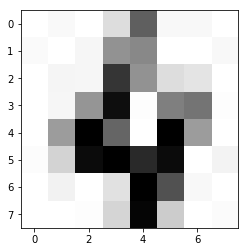

Actual: 4; Predicted: 8


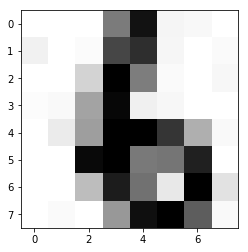

Actual: 4; Predicted: 7


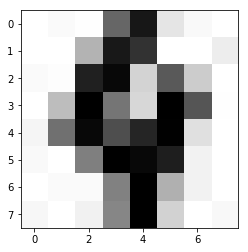

Actual: 8; Predicted: 1


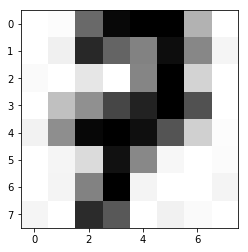

Actual: 9; Predicted: 5


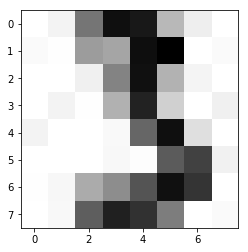

Actual: 6; Predicted: 4


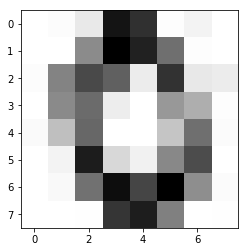

Actual: 3; Predicted: 7


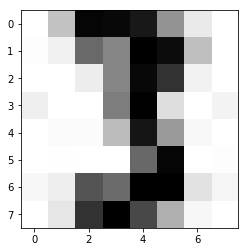

Actual: 4; Predicted: 7


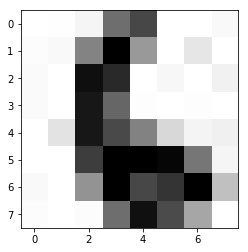

Actual: 3; Predicted: 2


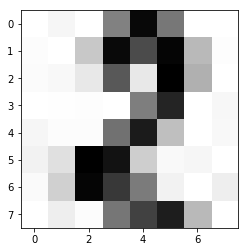

Actual: 8; Predicted: 1


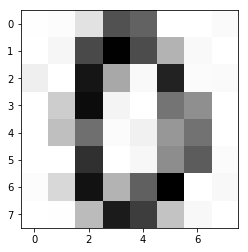

Actual: 9; Predicted: 5


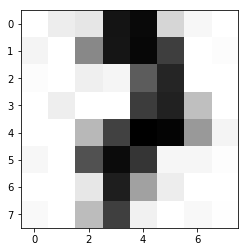

Actual: 9; Predicted: 7


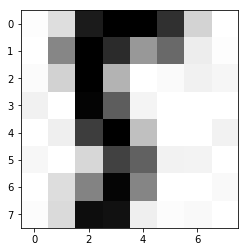

Actual: 8; Predicted: 5


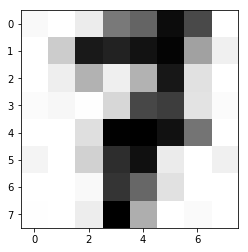

Actual: 0; Predicted: 4


In [274]:
%matplotlib inline

for i in range(len(y_actual)):
    if y_actual[i] != y_predict_rf[i]:
        img = mpimg.imread('Digit/' + str(i) + '.jpg')
        plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
        plt.show()
        print('Actual: ' + str(y_actual[i]) + '; Predicted: ' + str(y_predict_rf[i]))

# Question 2


a. 
    iii. is correct. When GPA is high enough, 𝜃5 *𝑋1 * 𝑋3  compensates for the loss from Th3 * X3 <br/>
b. 

In [277]:
Th0 = 30
Th1 = 20
Th2 = 0.07
Th3 = -30
Th4 = 0.01
Th5 = 10
X1 = 4
X2 = 27
X3 = 0

In [278]:
Target = Th0 + (Th1 * X1) + (Th2 * X2) + (Th3 * X3) + (Th4 * X1 * X2) + (Th5 * X1 * X3)

In [279]:
print(Target)

112.97


# Question 3

\begin{equation*}
\mathbf{A} =  
\begin{vmatrix}
\ 5 & -3 & 3 & 7 \\
\ 4 & 2 & -8 & 6 \
\end{vmatrix}
\end{equation*}

\begin{equation*}
\mathbf{B} =  
\begin{vmatrix}
\ 3 \\
\ 7 \\
\ -9 \\
\ 2 \
\end{vmatrix}
\end{equation*}



\begin{equation*}
\mathbf{A * B} =  
\begin{vmatrix}
\ -19 \\
\ 110 \\
\end{vmatrix}
\end{equation*}

### Mappers

Output:
(0,5*3)
(0, -3*7)
(0,3*9)
(0,7*2)
(1,4*3)
(1,7*2)
(1, -8*-9)
(1,6*2)

### Reducers

Input:
(0, 5*3 + -3*7 = 3*9+ 7*2)
(1, 4*3 + 2*7, -8*-9 + 6*2)
Output:
(0, -19)
(1,110)